## Importing the Dependecies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

## Data Collection and Analysis

In [2]:
# Loading the dataset from csv file to pandas dataframe
Mart_dataset = pd.read_csv('Train.csv')

In [3]:
Mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Number of Data Point and No of features
Mart_dataset.shape

(8523, 12)

In [5]:
# Geting some information about the data
Mart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Categorical Features

* Item_identifier
* Item_Fat_Content
* Item_Type
* Outlet_Identifier 
* Outlet_Size
* Outlet_Location_Type
* Outlet_Type

In [6]:
# Checking for missing values
Mart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Handling Missing Values

* Mean--> Average Value
* Mode--> Most repeated Value

In [7]:
# Mean Value of Item weight Column
Mart_dataset['Item_Weight'].mean()

12.857645184135976

In [8]:
# Filling the missing values in "Item_Weight" column with mean value
Mart_dataset['Item_Weight'].fillna(Mart_dataset['Item_Weight'].mean(),inplace=True)

In [9]:
# Checking for missing values
Mart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Replacing the missing value in "Outlet_Size" with mode

In [10]:
mode_of_outlet_size = Mart_dataset.pivot_table(values='Outlet_Size',columns = 'Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [11]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
missing_values = Mart_dataset['Outlet_Size'].isnull()

In [13]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [14]:
Mart_dataset.loc[missing_values,'Outlet_Size'] = Mart_dataset.loc[missing_values,'Outlet_Type'].apply(lambda x : mode_of_outlet_size[x])

In [15]:
# Checking for missing values
Mart_dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis

In [16]:
# Statistical Measure about the data
Mart_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##  Numerical Features

In [17]:
sns.set()

<Figure size 432x432 with 0 Axes>

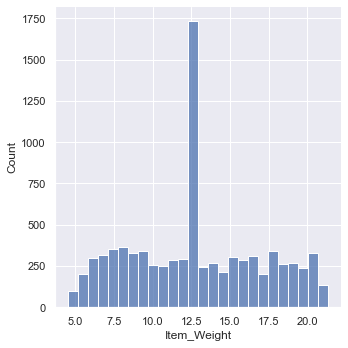

In [18]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.displot(Mart_dataset['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

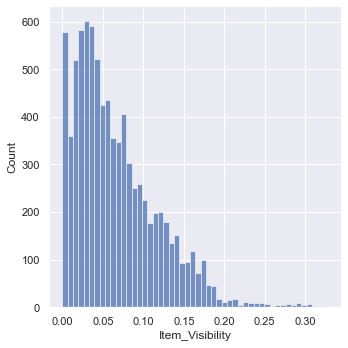

In [19]:
# Item_Visibilty distribution
plt.figure(figsize=(6,6))
sns.displot(Mart_dataset['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

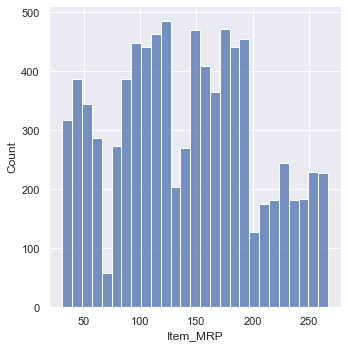

In [20]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.displot(Mart_dataset['Item_MRP'])
plt.show()

<Figure size 432x432 with 0 Axes>

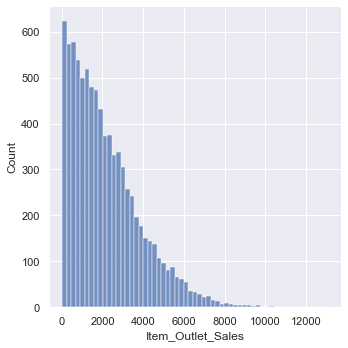

In [21]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(Mart_dataset['Item_Outlet_Sales'])
plt.show()

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

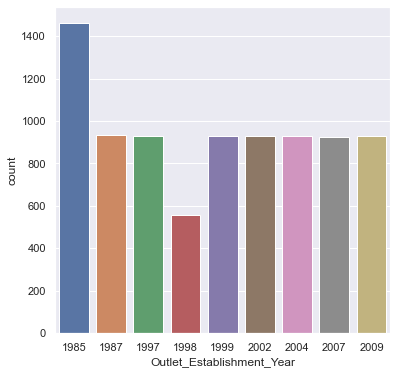

In [22]:
# Outlet Establishment_Year_Column
plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Establishment_Year',data = Mart_dataset)

## Categorical Feature    

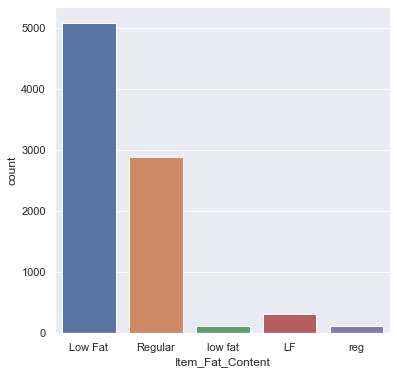

In [23]:
# Item_Fat_Content Column
plt.figure(figsize=(6,6))
sns.countplot(x = 'Item_Fat_Content',data = Mart_dataset)
plt.show()

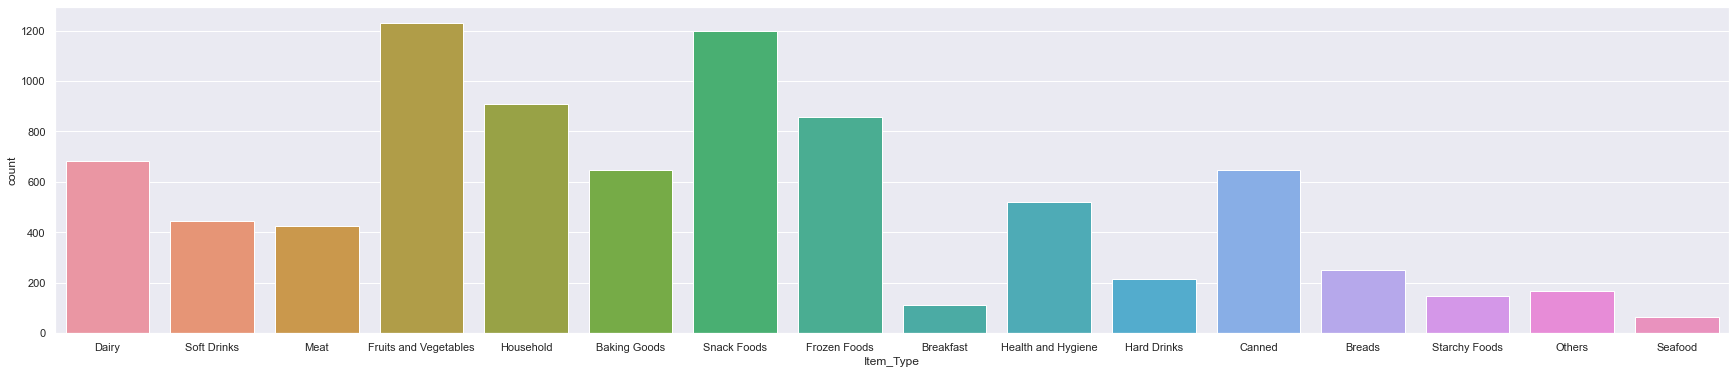

In [24]:
# Item_Type Column
plt.figure(figsize=(30,6))
sns.countplot(x = 'Item_Type',data = Mart_dataset)
plt.show()

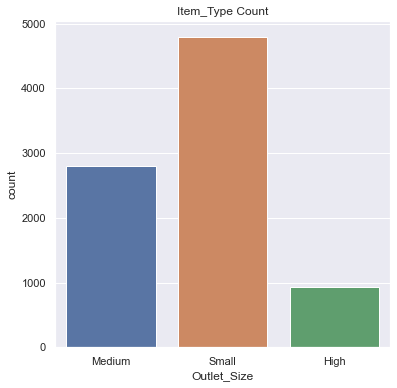

In [25]:
# Outlet_Size Column

plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Size', data = Mart_dataset)
plt.title('Item_Type Count')
plt.show()

## Data Preprocessing

In [26]:
Mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
Mart_dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
Mart_dataset.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace = True)

In [29]:
Mart_dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Label Encoding 

In [30]:
encoder = LabelEncoder()

In [31]:
Mart_dataset['Item_Identifier'] = encoder.fit_transform(Mart_dataset['Item_Identifier'])
Mart_dataset['Item_Fat_Content'] = encoder.fit_transform(Mart_dataset['Item_Fat_Content'])
Mart_dataset['Item_Type'] = encoder.fit_transform(Mart_dataset['Item_Type'])
Mart_dataset['Outlet_Location_Type'] = encoder.fit_transform(Mart_dataset['Outlet_Location_Type'])
Mart_dataset['Outlet_Identifier'] = encoder.fit_transform(Mart_dataset['Outlet_Identifier'])
Mart_dataset['Outlet_Type'] = encoder.fit_transform(Mart_dataset['Outlet_Type'])
Mart_dataset['Outlet_Size'] = encoder.fit_transform(Mart_dataset['Outlet_Size'])

In [32]:
Mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Splitting Feature and Target

In [33]:
X = Mart_dataset.drop('Item_Outlet_Sales',axis=1)
Y = Mart_dataset['Item_Outlet_Sales']

In [34]:
print(X,Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

## Splitting the Data into Training Data And Testing Data

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


## Training the Machine Learining Model

In [37]:
model = XGBRegressor()

In [38]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Model Evaluation

In [39]:
# Prediction on training data
training_data_prediction = model.predict(X_train)

In [40]:
# R squared Value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('The r2 Score of Training data: ',r2_train)

The r2 Score of Training data:  0.8639680373364909


In [41]:
# Prediction on training data
test_data_prediction = model.predict(X_test)

In [42]:
# R squared Value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('The r2 Score of Training data: ',r2_test)

The r2 Score of Training data:  0.5233136709735687
